# SPACESHIP TITANIC

In [1]:
import pandas as pd # data manipulation and data handling
import numpy as np # linear algebra
import matplotlib as plt # data vizualization
import seaborn as sns # data visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("dark")


In [2]:
# train data
train=pd.read_csv("train.csv") # read the file
train.head() # display the dataset with top 5 records

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# test data
test=pd.read_csv("test.csv") # read test data
test.head() # display top 5 records

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print()
print("Shape of the train dataset----",train.shape)
print()


Shape of the train dataset---- (8693, 14)



In [6]:
train.nunique() # unique values in each columns

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

# DATA EXPLORATION

### TARGET VARIABLE

In [7]:
train.Transported.unique() # unique values in transported

array([False,  True])

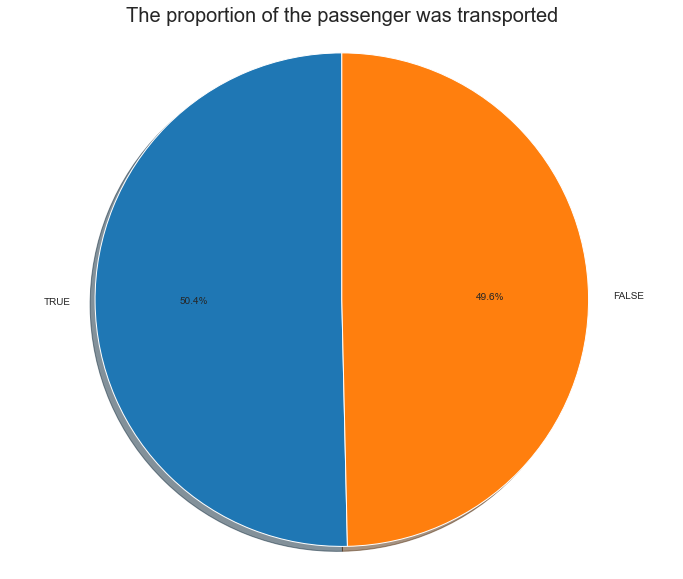

In [8]:
# vizualize target variable
labels = 'TRUE', 'FALSE' # labels
sizes = [train.Transported[train["Transported"]==True].count(), train.Transported[train["Transported"]==False].count()]

fig1, ax1 = plt.subplots(figsize=(12, 10)) # figzize
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# percentage and angle 
ax1.axis('equal')
plt.title("The proportion of the passenger was transported", size = 20)# plot title
plt.show()

In [9]:
# both true and false are equally distributed, this dataset seems like balanced.

### BIVARIATE ANALYSIS for Categorical variable

In [10]:
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"] # assign categorical variable
numeric_col = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"] # assign numeric variable

In [11]:
def labels ():  ### here i creat the function for applying labels in each graphs
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='black',rotation = 45,ha='center',va='bottom')
# this can plot with values 

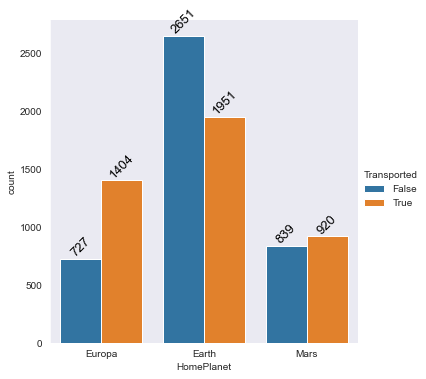

In [12]:
# HomePlanet vs transprted
# homeplanet is The planet the passenger departed from, typically their planet of permanent residence.
sns.catplot(x="HomePlanet",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

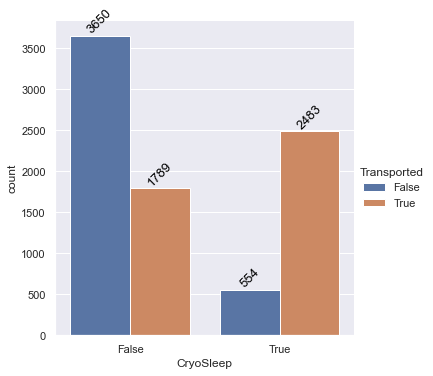

In [13]:
# CryoSleep vs Transported
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
#Passengers in cryosleep are confined to their cabins.
sns.catplot(x="CryoSleep",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

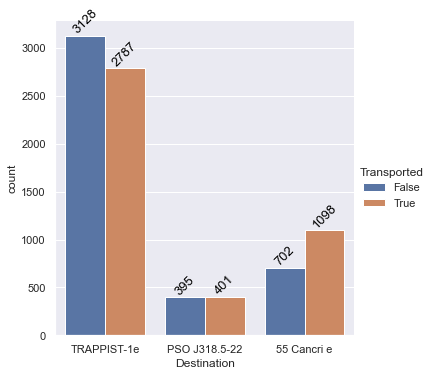

In [14]:
# Destination vs transported
# Destination - The planet the passenger will be debarking to.

sns.catplot(x="Destination",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

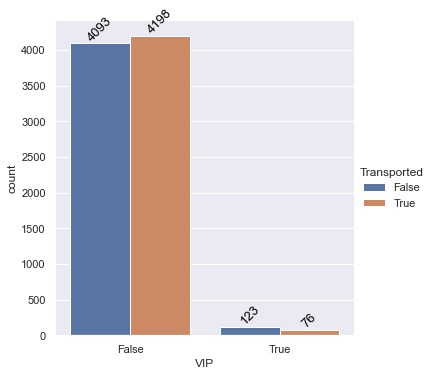

In [15]:
# VIP vs Transported
# Whether the passenger has paid for special VIP service during the voyage.
sns.catplot(x="VIP",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

In [16]:
### BIVARIATE ANALYSIS for numeric value

In [17]:
train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


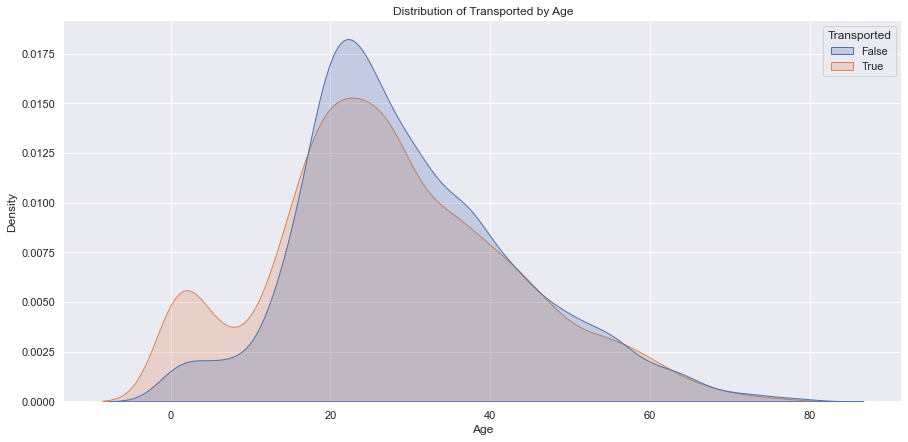

In [18]:
# age vs transported
plt.figure(figsize=(15,7))
sns.kdeplot(train['Age'], hue=train['Transported'], fill=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('Age')
plt.title('Distribution of Transported by Age');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


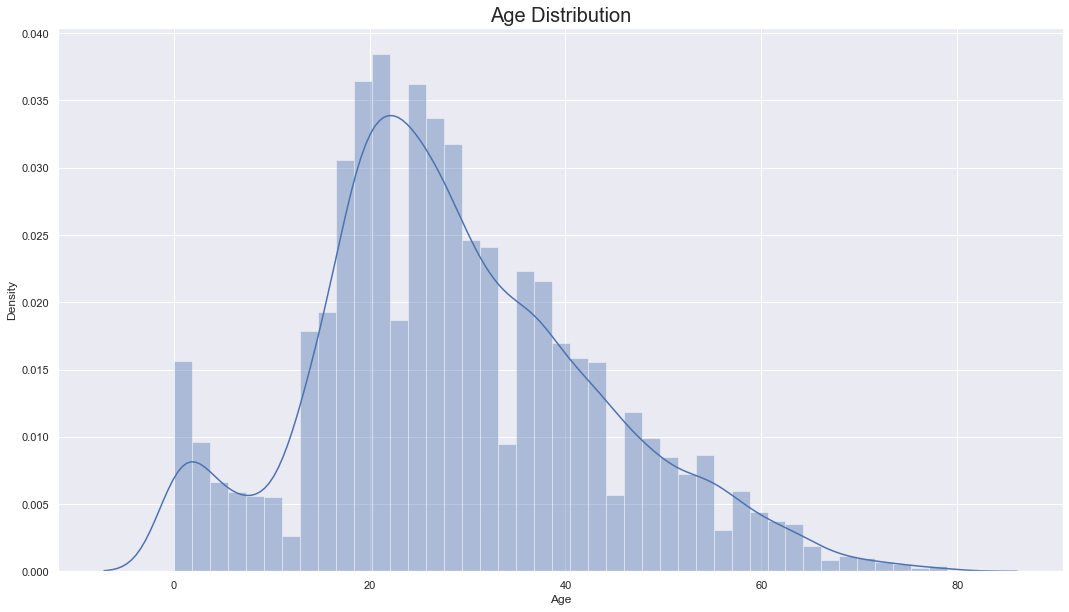

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


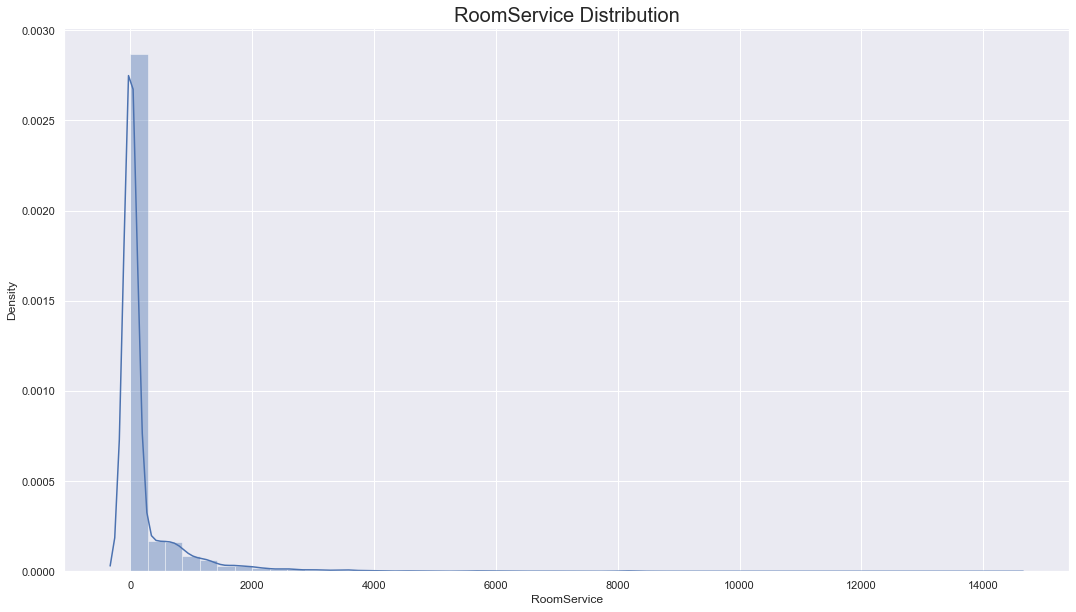

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


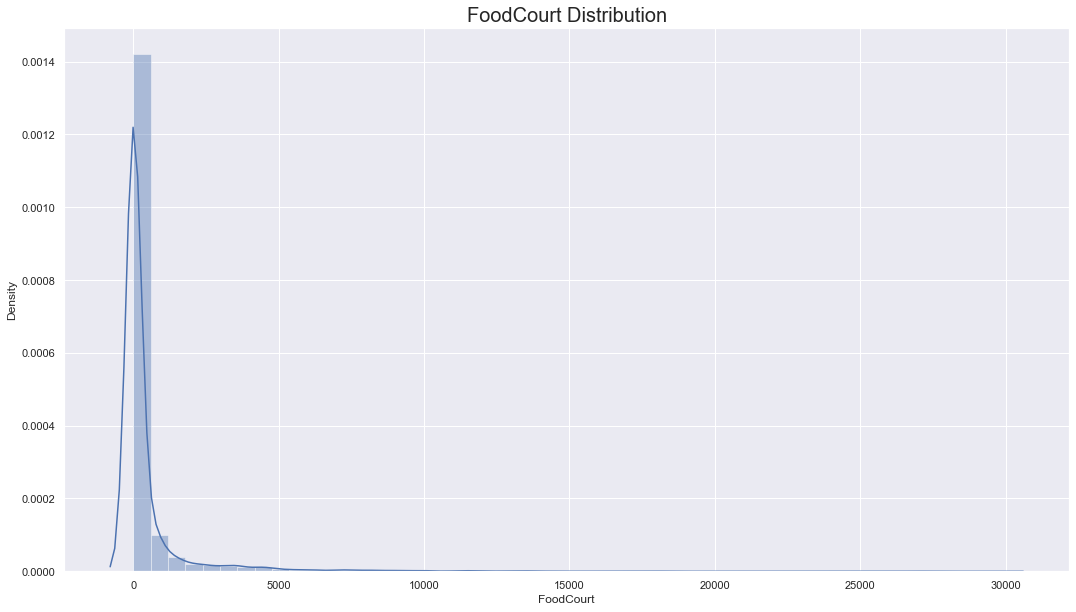

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


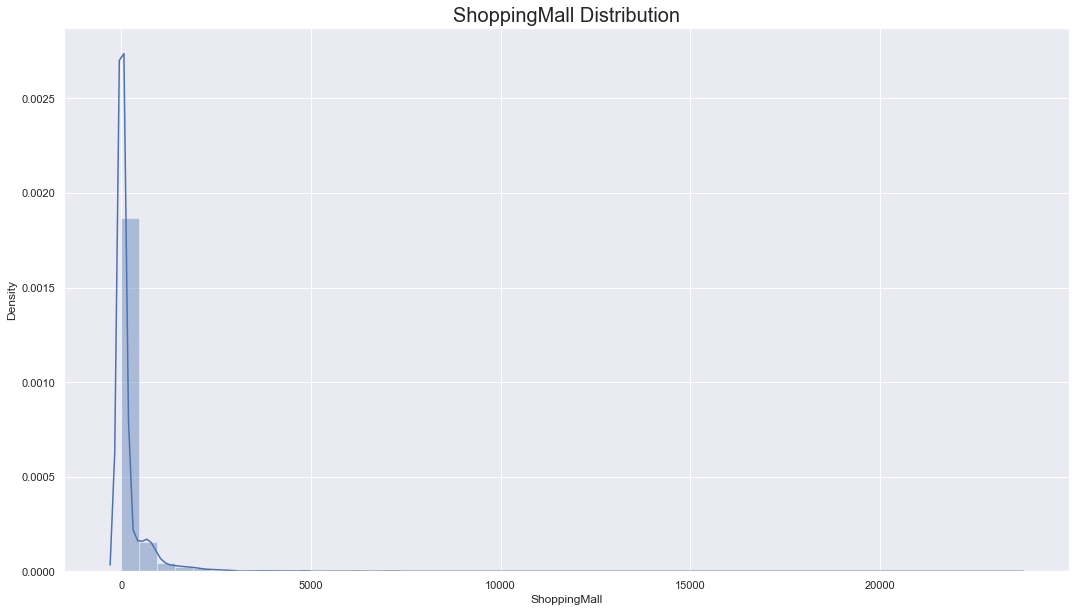

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


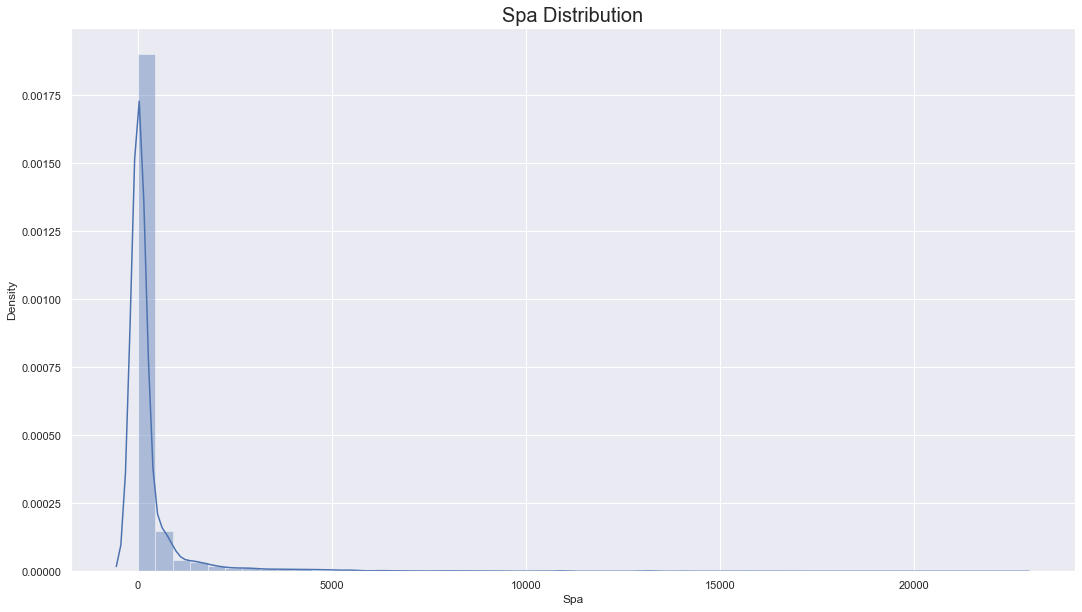

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


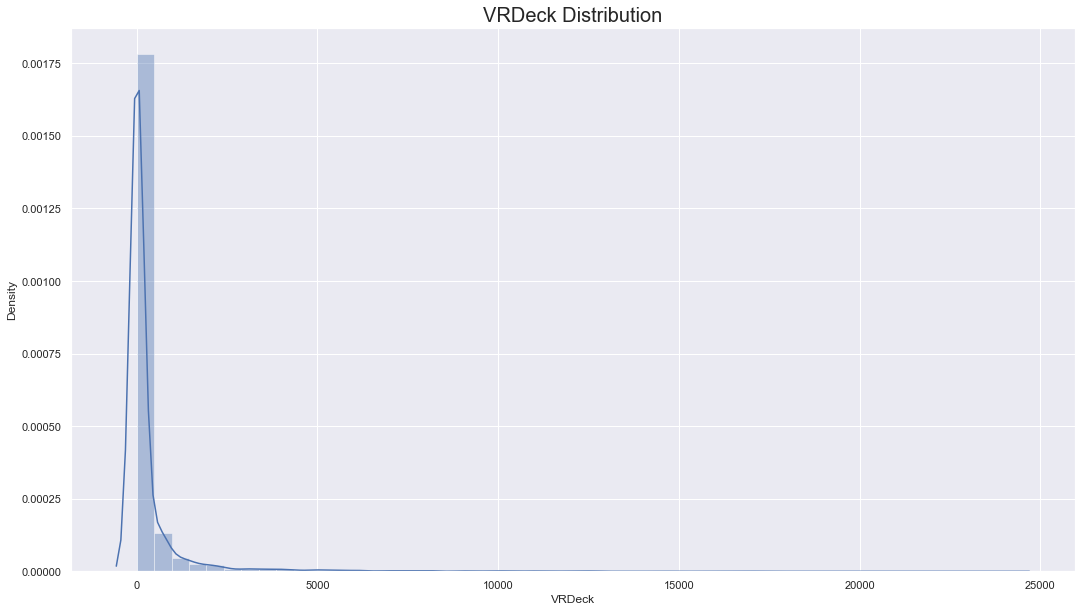

In [19]:
for feature in numeric_col:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(train[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# DATA PRE-PROCESSING

In [20]:
print("number of missing value in each features for train Data:")
print()
print(train.isnull().sum())

number of missing value in each features for train Data:

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [21]:
train = train.drop(['PassengerId','Cabin','Name'],axis=1) # drop unwanted column

In [22]:
print("number of missing value in each features for test Data:")
print()
print(test.isnull().sum())

number of missing value in each features for test Data:

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [23]:
test = test.drop(['Cabin','Name'],axis=1) # drop unwanded column

In [24]:
missing_columns = ["HomePlanet", "CryoSleep","Age","Destination","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]# all missing features
for i in missing_columns:
    print("Column :", i) # print features
    print("Unique :",train[i].nunique())# printing n unique
    print("Dtypes :",train[i].dtypes)  
    print("--------------------------------------------")

Column : HomePlanet
Unique : 3
Dtypes : object
--------------------------------------------
Column : CryoSleep
Unique : 2
Dtypes : object
--------------------------------------------
Column : Age
Unique : 80
Dtypes : float64
--------------------------------------------
Column : Destination
Unique : 3
Dtypes : object
--------------------------------------------
Column : VIP
Unique : 2
Dtypes : object
--------------------------------------------
Column : RoomService
Unique : 1273
Dtypes : float64
--------------------------------------------
Column : FoodCourt
Unique : 1507
Dtypes : float64
--------------------------------------------
Column : ShoppingMall
Unique : 1115
Dtypes : float64
--------------------------------------------
Column : Spa
Unique : 1327
Dtypes : float64
--------------------------------------------
Column : VRDeck
Unique : 1306
Dtypes : float64
--------------------------------------------


### HANDLING MISSING VALUE

In [25]:
# filling null values for categorical values
train["HomePlanet"].fillna(train["HomePlanet"].mode()[0],inplace=True)
test["HomePlanet"].fillna(test["HomePlanet"].mode()[0],inplace=True)

In [26]:
# Filling CryoSleep features
train["CryoSleep"].fillna(train["CryoSleep"].mode()[0],inplace=True)
test["CryoSleep"].fillna(test["CryoSleep"].mode()[0],inplace=True)

In [27]:
train["Destination"].fillna(train["Destination"].mode()[0],inplace=True)
test["Destination"].fillna(test["Destination"].mode()[0],inplace=True)

In [28]:
train["VIP"].fillna(train["VIP"].mode()[0],inplace=True)
test["VIP"].fillna(test["VIP"].mode()[0],inplace=True)

In [29]:
# FILLING NULL VALUES FOR NUMERIC

In [30]:
train["Age"].fillna(train["Age"].mean(),inplace =True)
test["Age"].fillna(train["Age"].mean(),inplace =True)

In [31]:
train["RoomService"].fillna(train["RoomService"].mean(),inplace =True)
test["RoomService"].fillna(train["RoomService"].mean(),inplace =True)

In [32]:
train["FoodCourt"].fillna(train["FoodCourt"].mean(),inplace =True)
test["FoodCourt"].fillna(train["FoodCourt"].mean(),inplace =True)

In [33]:
train["ShoppingMall"].fillna(train["ShoppingMall"].mean(),inplace =True)
test["ShoppingMall"].fillna(train["ShoppingMall"].mean(),inplace =True)

In [34]:
train["VRDeck"].fillna(train["VRDeck"].mean(),inplace =True)
test["VRDeck"].fillna(train["VRDeck"].mean(),inplace =True)

In [35]:
train["Spa"].fillna(train["Spa"].mean(),inplace =True)
test["Spa"].fillna(train["Spa"].mean(),inplace =True)

In [36]:
# re checking the null values 
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [37]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [38]:
# grouping the age 

In [39]:
train.loc[train['Age'] <= 14, 'Age'] = 0
train.loc[(train['Age'] > 14) & (train['Age'] <= 24), 'Age'] = 1
train.loc[(train['Age'] > 24) & (train['Age'] <= 39), 'Age'] = 2
train.loc[(train['Age'] > 39) & (train['Age'] <= 59), 'Age'] = 3
train.loc[train['Age'] > 59, 'Age'] = 4
    
test.loc[test['Age'] <= 14, 'Age'] = 0
test.loc[(test['Age'] > 14) & (test['Age'] <= 24), 'Age'] = 1
test.loc[(test['Age'] > 24) & (test['Age'] <= 39), 'Age'] = 2
test.loc[(test['Age'] > 39) & (test['Age'] <= 59), 'Age'] = 3
test.loc[test['Age'] > 59, 'Age'] = 4

# LABEL ENCODING

In [40]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"]
labling = pd.DataFrame()

for column in categorical_col:
    labelencoder = LabelEncoder()
    train[column] = labelencoder.fit_transform(train[column])
    labling[column] = train[column]
    labling['_'+column] =  labelencoder.inverse_transform(train[column])

In [41]:
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"]
labling = pd.DataFrame()

for column in categorical_col:
    labelencoder = LabelEncoder()
    test[column] = labelencoder.fit_transform(test[column])
    labling[column] = test[column]
    labling['_'+column] =  labelencoder.inverse_transform(test[column])

# CO-RELATION

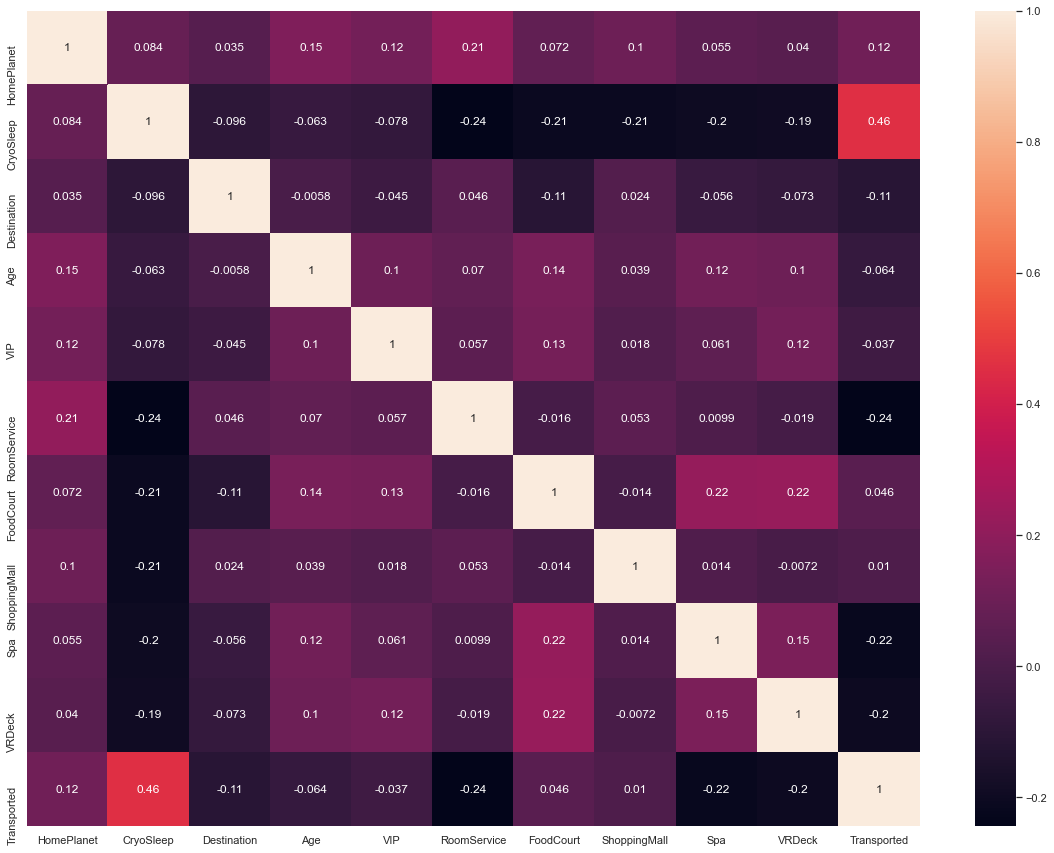

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True);

In [43]:
# TRAIN TEST SPLIT

In [44]:
features = [col for col in train.columns if col not in ['Transported']]

X = train[features]
y = train['Transported']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# RANDOM FOREST - HYPER PARAMETER TUNING

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [47]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [48]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [49]:
print(rf_random.best_params_) ## this is the best parameter to achieve max accuracy  

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [50]:
print(rf_random.best_estimator_) 

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)


In [51]:
rf_random.best_score_

0.7949381650848433

In [52]:
### fitting random forest model with best parameter which randomsearch CV gives
forest = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=2,min_samples_leaf= 4, 
                       n_estimators=1600)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=1600)

In [53]:
###  importing confusion matrix for  evaluating  the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [54]:
y_pred = forest.predict(X_test)## assigning y_prediction for getting accuracy
con_matrix = confusion_matrix(y_test, y_pred) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[664 199]
 [154 722]]
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.77      0.79       863
        True       0.78      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Accuracy: 0.79700977573318


In [55]:
prediction = forest.predict(test[features])
prediction

array([ True, False,  True, ...,  True,  True,  True])

In [57]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': prediction})
output.to_csv('submission.csv', index=False)